# Precipitación Acumulada Mensual en México
## Análisis Exploratorio de Datos

A partir de datos registrados por **CONAGUA** de la precipitación Acumulada Mensual por entidad federativa, se busca hacer un análisis exploratorio con enfoque en Nuevo León para apoyar el desarrollo del "**Modelo de Redes Neuronales del Sistema de Agua en el Área Metropolitana de Monterrey**" como proyecto de tesis.

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_excel("data/Precipitacion/1985Precip.xls", header=1)
first_column_name = df.columns[0]
first_column = df.iloc[:, 0]
entidades_federativas = pd.DataFrame({first_column_name: first_column})

In [3]:
df.head(5)

,ENTIDAD,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL
0,AGUASCALIENTES,4.914729,1.588740,1.947601,17.612315,21.458081,137.052753,85.398249,68.346737,47.644807,50.720046,4.287958,23.386522,464.358537
1,BAJA CALIFORNIA,12.150562,23.625055,9.962204,3.723647,0.017576,0.343847,0.770047,0.000000,13.504450,17.268965,64.455974,28.568834,174.391162
2,BAJA CALIFORNIA SUR,30.304723,0.058778,0.334605,0.259919,0.128790,0.331742,19.552045,22.872792,18.475133,15.577332,6.605846,1.133051,115.634756
3,CAMPECHE,20.943153,26.685829,16.509803,4.248756,233.420941,124.723530,142.713987,194.129643,154.579157,32.833140,60.179980,4.037611,1015.005528
4,COAHUILA,40.714546,6.152208,4.887759,43.611932,46.949689,46.314182,20.239590,29.999508,44.317659,41.583808,8.830908,6.715672,340.317462


### Limpieza de Datos

Los datos vienen guardados en múltiples archivos .xls por año desde 1985 hasta 2022. Los datos vienen mensuales por cada entidad federativa y nacional. No hay datos faltantes.

El objetivo será guardar los datos en diferentes formatos que facilite su análisis por mes, por año y por estado. Buscamos responder:

1) ¿Qué mes tiene mayor precipitación?
2) ¿Qué estado tiene mayor precipitación?
3) Serie temporal de precipitación por estado.
4) Distribución de probabilidad de presipitación.
 
El dataframe principal (serie temporal) será ordenado por entidad federativa (fila) en orden cronológico (columnas).

In [4]:
# Define the directory where your Excel files are located
excel_files_directory = 'data/Precipitacion/'

# Initialize an empty list to store DataFrames
dataframes_main = []
dataframes_anual = []
df_monthly = pd.DataFrame()

# Loop through the files in the directory
for filename in os.listdir(excel_files_directory):
    if filename.endswith('.xls') or filename.endswith('.xlsx'):
        # Read each Excel file and append it to the list
        file_path = os.path.join(excel_files_directory, filename)
        df = pd.read_excel(file_path, header=1)  # Read Excel file, assuming header is in the second row
        df1 = df.iloc[:, 1:-1]
        df2 = df.iloc[:, 13]
        
        dataframes_main.append(df1)
        dataframes_anual.append(df2)
        
# Concatenate all DataFrames into one
df = pd.concat(dataframes_main,axis=1)
df_anual = pd.concat(dataframes_anual,axis=1)

for da_frame in dataframes_main:
    if df_monthly.empty:
        df_monthly = da_frame  # Set the first DataFrame in the list as the initial value
    else:
        df_monthly = df_monthly.add(da_frame, fill_value=0)  # Sum the DataFrames, filling in missing values with 0

df_monthly = df_monthly/12

In [5]:
# Create a date range from January 1985 to December 2022\
from datetime import datetime

date_range = pd.date_range("1985-01-01", "2022-12-31", freq="M")
df.columns = date_range.strftime("%Y-%m")

In [6]:
df = pd.concat([entidades_federativas, df], axis=1, ignore_index=False)
df.to_csv('results\precipitacion_historica.csv', index=False)

In [7]:
df_anual.columns = [year for year in range(1985, 2023)]
df_anual = pd.concat([entidades_federativas, df_anual], axis=1, ignore_index=False)
df_anual.to_csv('results\precipitacion_anual_total.csv', index=False)

In [8]:
df_monthly = pd.concat([entidades_federativas, df_monthly], axis=1, ignore_index=False)
df_monthly.to_csv('results\precipitacion_mensual_promedio.csv', index=False)

### Resultado de limpieza de datos

Las siguientes tablas serán exportadas como archivos csv para su uso, se pueden encontrar en la carpeta de resultados.

In [9]:
print("Precipitación Acumulada (mm) mensual desde 1985 a 2022 por Entidad Federativa en México")
display(df.head(5))
print("Precipitación Acumulada (mm) anual desde 1985 a 2022 por Entidad Federativa en México")
display(df_anual.head(5))
print("Precipitación Acumulada (mm) promedio mensual por Entidad Federativa en México")
display(df_monthly.head(5))

Precipitación Acumulada (mm) mensual desde 1985 a 2022 por Entidad Federativa en México


,ENTIDAD,1985-01,1985-02,1985-03,1985-04,1985-05,1985-06,1985-07,1985-08,1985-09,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,AGUASCALIENTES,4.914729,1.588740,1.947601,17.612315,21.458081,137.052753,85.398249,68.346737,47.644807,...,0.0,15.3,6.5,39.2,92.6,123.6,53.5,48.0,6.0,0.2
1,BAJA CALIFORNIA,12.150562,23.625055,9.962204,3.723647,0.017576,0.343847,0.770047,0.000000,13.504450,...,13.8,0.7,0.0,0.0,2.9,15.3,54.9,4.0,6.6,15.4
2,BAJA CALIFORNIA SUR,30.304723,0.058778,0.334605,0.259919,0.128790,0.331742,19.552045,22.872792,18.475133,...,0.1,0.0,0.0,4.7,22.2,57.4,272.0,1.4,0.5,1.5
3,CAMPECHE,20.943153,26.685829,16.509803,4.248756,233.420941,124.723530,142.713987,194.129643,154.579157,...,52.3,79.2,141.3,180.9,138.1,199.3,187.8,127.2,129.9,65.1
4,COAHUILA,40.714546,6.152208,4.887759,43.611932,46.949689,46.314182,20.239590,29.999508,44.317659,...,0.1,14.2,22.0,8.8,14.4,114.0,50.0,26.0,6.7,1.3


Precipitación Acumulada (mm) anual desde 1985 a 2022 por Entidad Federativa en México


,ENTIDAD,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AGUASCALIENTES,464.358537,434.904801,371.835178,406.821960,404.080402,671.880299,649.322984,603.524456,463.473086,...,756.44,534.66,836.73,574.89,579.41,768.66,453.1,498.1,672.3,389.8
1,BAJA CALIFORNIA,174.391162,174.671611,317.290533,192.406248,89.656432,164.909622,93.815892,219.024305,271.654827,...,193.76,85.06,262.86,218.97,131.73,125.31,206.1,103.5,99.1,123.7
2,BAJA CALIFORNIA SUR,115.634756,140.818859,120.910208,109.012021,214.875187,262.713471,48.775653,119.763663,340.344081,...,228.96,334.72,361.65,200.02,174.74,163.18,270.6,103.0,173.5,360.3
3,CAMPECHE,1015.005528,969.872671,1064.172019,1274.786985,1199.983944,1173.543356,1285.424132,1446.418539,1269.553723,...,1698.52,1390.12,1326.08,1176.97,1407.30,1389.79,1303.2,1779.3,1218.7,1423.4
4,COAHUILA,340.317462,412.242148,396.092615,384.099335,322.249047,396.062589,471.566103,551.513471,312.248045,...,443.66,423.84,525.03,554.84,358.54,396.77,261.5,227.2,246.5,261.4


Precipitación Acumulada (mm) promedio mensual por Entidad Federativa en México


,ENTIDAD,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,AGUASCALIENTES,42.934488,38.958168,17.017400,17.085431,57.680218,269.452290,391.982953,338.905383,278.779802,116.133269,31.717841,27.252812
1,BAJA CALIFORNIA,93.866521,114.499389,75.166369,30.992015,9.219434,4.098296,13.205192,29.995388,40.142060,42.876258,44.517871,84.827986
2,BAJA CALIFORNIA SUR,30.788542,18.579770,10.560183,3.947551,1.242924,8.651636,53.120202,151.175197,222.848160,51.468051,32.072151,29.700165
3,CAMPECHE,136.512653,93.059961,67.967488,95.252507,286.385839,686.721057,551.156752,667.951614,721.009023,518.977329,241.192370,143.773353
4,COAHUILA,39.878823,35.064211,50.227582,64.223416,137.173028,150.244153,162.403893,166.249026,225.229928,110.642883,53.585967,36.221099


### Visualización de datos

In [10]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


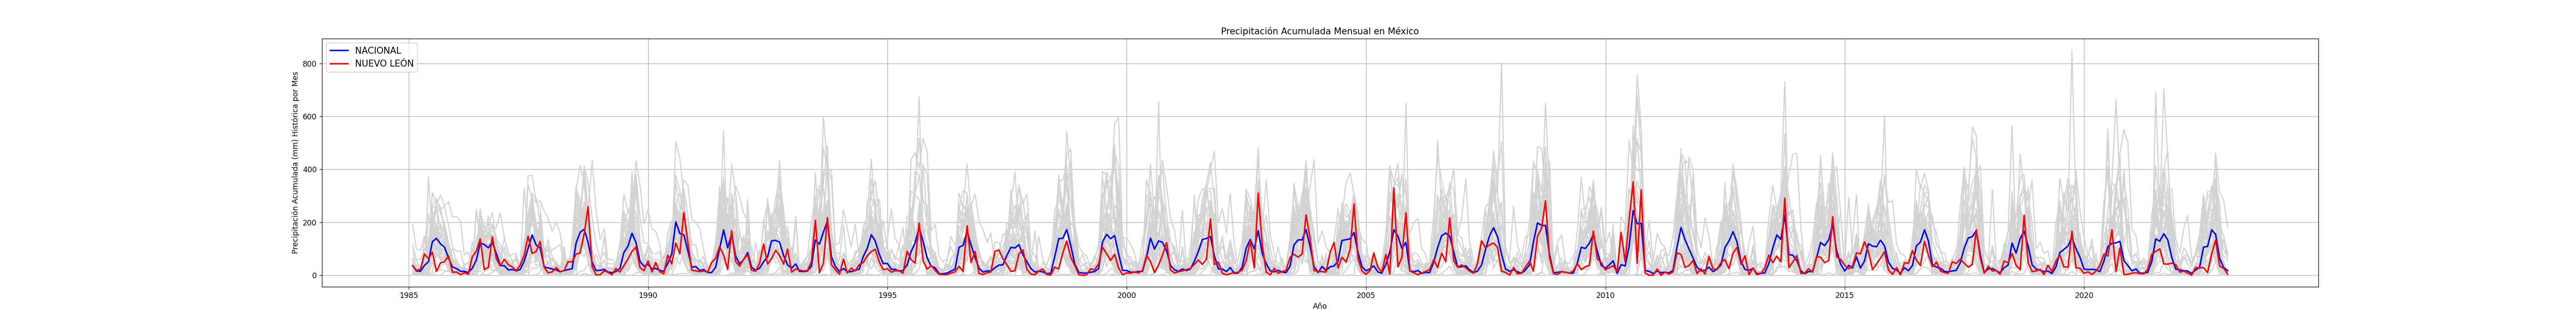

In [11]:
line_labels = (df.iloc[18, 0],df.iloc[32, 0])

%matplotlib notebook
plt.figure(figsize=(48, 6))  # Adjust the width and height as needed
# Create a line plot for each line label
for i in range(33):
    if i == 18:  # Highlight and label Nuevo Leon
        continue
    elif i == 32:  # Highlight and label Nacional
        plt.plot(date_range, df.iloc[i, 1:].values.tolist(), label=line_labels[1], color='blue', linewidth=2)
    else:
        plt.plot(date_range, df.iloc[i, 1:].values.tolist(), color='lightgray')
plt.plot(date_range, df.iloc[18, 1:].values.tolist(), label=line_labels[0], color='red', linewidth=2)

# Customize the plot
plt.xlabel('Año')
plt.ylabel('Precipitación Acumulada (mm) Histórica por Mes')
plt.title('Precipitación Acumulada Mensual en México')
plt.legend(prop={'size': 12}, loc = "upper left")
plt.grid(True)

plt.savefig('results\precipitacion_mensual.png') 
plt.show()

<IPython.core.display.Javascript object>


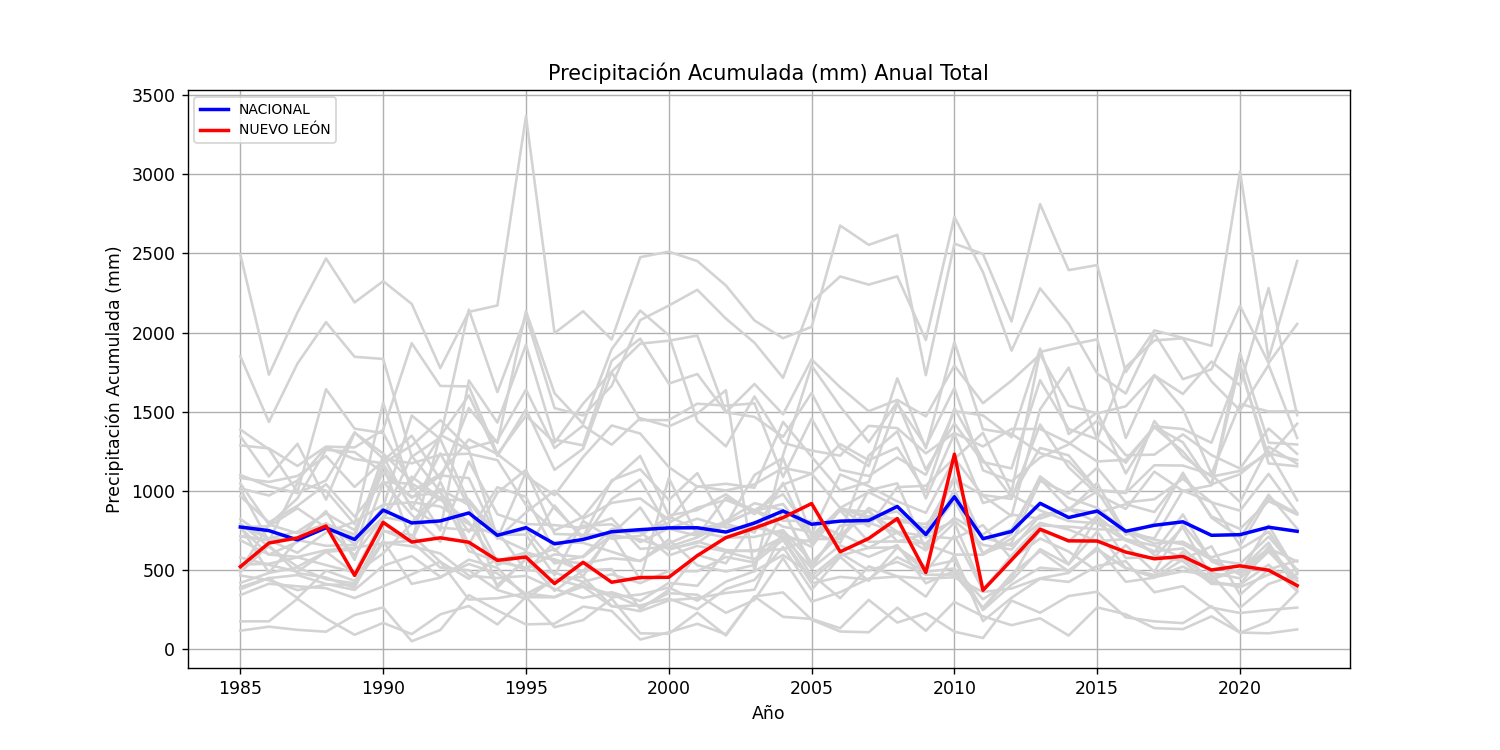

In [12]:
year = df_anual.columns[1:].tolist()
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
# Create a line plot for each line label

for i in range(33):
    if i == 18:  # Highlight and label Nuevo Leon
        continue
    elif i == 32:  # Highlight and label Nacional
        plt.plot(year, df_anual.iloc[i, 1:].values.tolist(), label=line_labels[1], color='blue', linewidth=2)
    else:
        plt.plot(year, df_anual.iloc[i, 1:].values.tolist(), color='lightgray')
plt.plot(year, df_anual.iloc[18, 1:].values.tolist(), label=line_labels[0], color='red', linewidth=2)

# Customize the plot
plt.xlabel('Año')
plt.ylabel('Precipitación Acumulada (mm)')
plt.title('Precipitación Acumulada (mm) Anual Total')
plt.legend(prop={'size': 8}, loc = "upper left")
plt.grid(True)

plt.savefig('results\precipitacion_anual.png') 
plt.show()

<IPython.core.display.Javascript object>


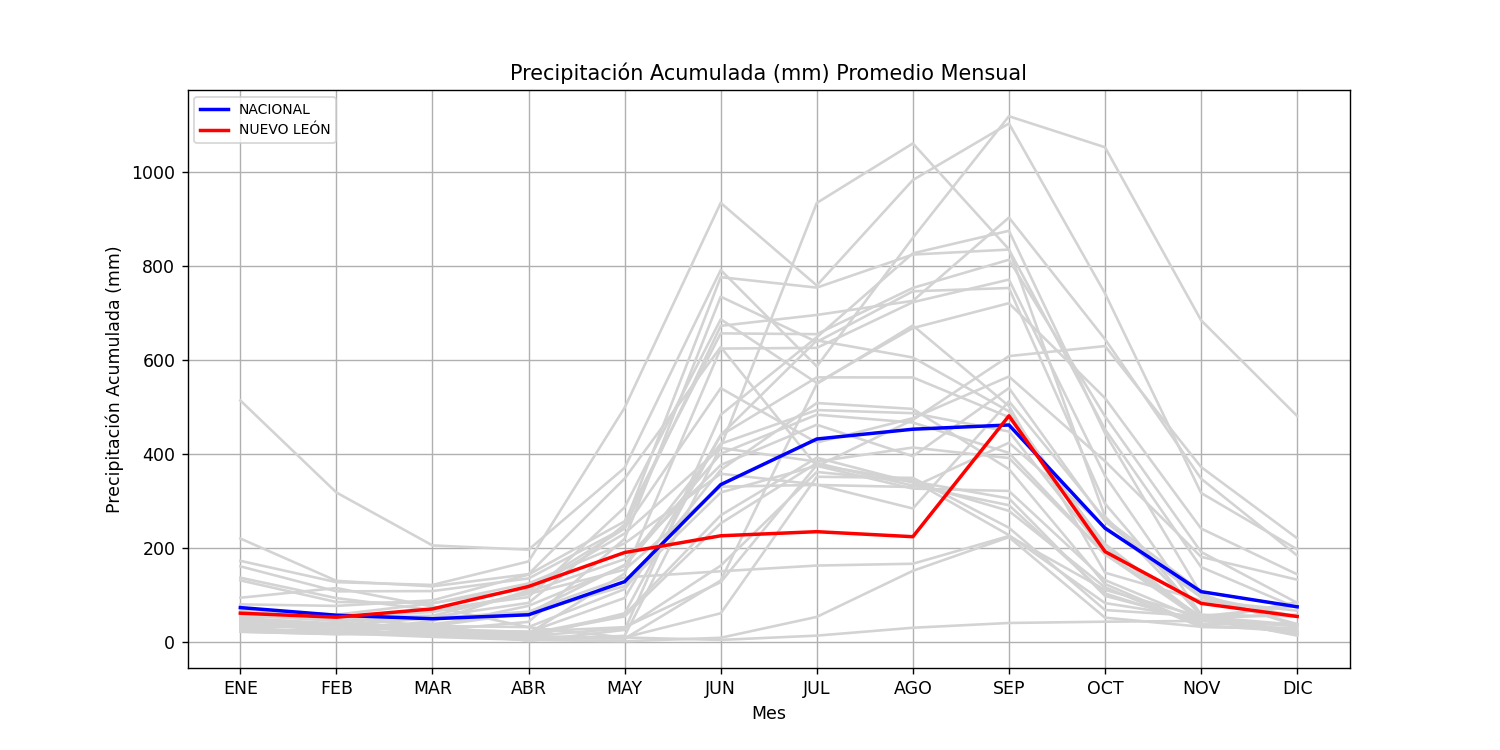

In [13]:
month = df_monthly.columns[1:].tolist()
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
# Create a line plot for each line label

for i in range(33):
    if i == 18:  # Highlight and label Nuevo Leon
        continue
    elif i == 32:  # Highlight and label Nacional
        plt.plot(month, df_monthly.iloc[i, 1:].values.tolist(), label=line_labels[1], color='blue', linewidth=2)
    else:
        plt.plot(month, df_monthly.iloc[i, 1:].values.tolist(), color='lightgray')
plt.plot(month, df_monthly.iloc[18, 1:].values.tolist(), label=line_labels[0], color='red', linewidth=2)

# Customize the plot
plt.xlabel('Mes')
plt.ylabel('Precipitación Acumulada (mm)')
plt.title('Precipitación Acumulada (mm) Promedio Mensual')
plt.legend(prop={'size': 8}, loc = "upper left")
plt.grid(True)

plt.savefig('results\precipitacion_avg_mensual.png') 
plt.show()